Deep Learning<br>
Project Phase: 1<br><br>
Group Number: 15<br>
1-Saman Soelimani Roudi (400206284)<br>
2-Mehran Rahnamania (400206251)

In [ ]:
!git clone https://github.com/XL2248/MSCTD

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Updating files: 100% (934/934), done.


In [ ]:
!ls

MSCTD  sample_data


In [ ]:
!cp MSCTD/MSCTD_data/ende/english_*.txt .
!cp MSCTD/MSCTD_data/ende/image_index_*.txt .
!cp MSCTD/MSCTD_data/ende/sentiment_*.txt .

In [ ]:
!ls

english_dev.txt      image_index_test.txt   sentiment_dev.txt
english_test.txt     image_index_train.txt  sentiment_test.txt
english_train.txt    MSCTD		    sentiment_train.txt
image_index_dev.txt  sample_data


In [ ]:
!pip -q install --upgrade --no-cache-dir gdown

In [ ]:
!ls

english_dev.txt      image_index_test.txt   sentiment_dev.txt
english_test.txt     image_index_train.txt  sentiment_test.txt
english_train.txt    MSCTD		    sentiment_train.txt
image_index_dev.txt  sample_data


In [ ]:
!gdown --id 1zOasrwm9gTy1C-wdwSq_v3haZ7o0juZU

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zOasrwm9gTy1C-wdwSq_v3haZ7o0juZU
To: /content/train_ende.zip
100% 2.90G/2.90G [00:50<00:00, 57.6MB/s]


In [ ]:
!ls

english_dev.txt      image_index_test.txt   sentiment_dev.txt
english_test.txt     image_index_train.txt  sentiment_test.txt
english_train.txt    MSCTD		    sentiment_train.txt
image_index_dev.txt  sample_data	    train_ende.zip


In [ ]:
!gdown --id 1HuvS1tOZrLAbae6Xz5ScL2HwVJF2e71N

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HuvS1tOZrLAbae6Xz5ScL2HwVJF2e71N
To: /content/dev.zip
100% 638M/638M [00:26<00:00, 23.8MB/s]


In [ ]:
!ls

dev.zip		   image_index_dev.txt	  sample_data	       train_ende.zip
english_dev.txt    image_index_test.txt   sentiment_dev.txt
english_test.txt   image_index_train.txt  sentiment_test.txt
english_train.txt  MSCTD		  sentiment_train.txt


In [ ]:
!gdown --id 1DyYZTT9y1J_Qz42EhEB5Fjp1RYDNTPsc

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DyYZTT9y1J_Qz42EhEB5Fjp1RYDNTPsc
To: /content/test.zip
100% 641M/641M [00:13<00:00, 49.3MB/s]


In [ ]:
!ls

dev.zip		   image_index_dev.txt	  sample_data	       test.zip
english_dev.txt    image_index_test.txt   sentiment_dev.txt    train_ende.zip
english_test.txt   image_index_train.txt  sentiment_test.txt
english_train.txt  MSCTD		  sentiment_train.txt


In [ ]:
!ls sample_data|head 

anscombe.json
california_housing_test.csv
california_housing_train.csv
mnist_test.csv
mnist_train_small.csv
README.md


In [ ]:
%%bash
for z in *.zip; do unzip "$z"; done

Archive:  dev.zip
  inflating: dev/0.jpg               
  inflating: dev/1.jpg               
  inflating: dev/10.jpg              
  inflating: dev/100.jpg             
  inflating: dev/1000.jpg            
  inflating: dev/1001.jpg            
  inflating: dev/1002.jpg            
  inflating: dev/1003.jpg            
  inflating: dev/1004.jpg            
  inflating: dev/1005.jpg            
  inflating: dev/1006.jpg            
  inflating: dev/1007.jpg            
  inflating: dev/1008.jpg            
  inflating: dev/1009.jpg            
  inflating: dev/101.jpg             
  inflating: dev/1010.jpg            
  inflating: dev/1011.jpg            
  inflating: dev/1012.jpg            
  inflating: dev/1013.jpg            
  inflating: dev/1014.jpg            
  inflating: dev/1015.jpg            
  inflating: dev/1016.jpg            
  inflating: dev/1017.jpg            
  inflating: dev/1018.jpg            
  inflating: dev/1019.jpg            
  inflating: dev/102.jpg        

##Creating MSCTDataset Class##

In [ ]:
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import pandas as pd
from numpy import asarray as ToNumpy
import numpy as np
import torch
import csv
import os
from PIL import Image

In [ ]:
class MSCTDataset():
    def __init__(self, text_path,image_index_path,sentiment_path,image_path,random_seed=42,transform = ToTensor()):
      self.df_text = pd.read_csv(text_path, delimiter = "\t",quoting=csv.QUOTE_NONE, header=None)
      self.df_sentiment = pd.read_csv(sentiment_path, delimiter = "\t", header=None)
      self.random_seed = random_seed
      self.transform = transform
      self.image_path = image_path
      self.df_image_index = pd.read_csv(image_index_path, delimiter = "\t", header=None)
      b=self.df_image_index[0].values
      c=[]
      for i in range(len(self.df_image_index.index)):
        c.append([int(s) for s in b[i][1:-1].split(',')])
      self.image_index_list = c
      self.image_index_np = np.array([np.array(x) for x in c],dtype=object)
    def __len__(self):
      return len(self.df_text.index)
    def __getitem__(self, idx):
      image= self.transform(Image.open(os.path.join(self.image_path ,str(idx)+'.jpg')))
      text = self.df_text.loc[idx].item()
      sentiment = self.df_sentiment.loc[idx].item()
      sample = {'text':text, 'images':image,'sentiment':sentiment}
      return sample

##Creating Training,Dev & Test Dataset Instances From MSCTDataset Class##

In [ ]:
training_data =  MSCTDataset('english_train.txt','image_index_train.txt','sentiment_train.txt','train_ende')

In [ ]:
dev_data =  MSCTDataset('english_dev.txt','image_index_dev.txt','sentiment_dev.txt','dev')

In [ ]:
test_data =  MSCTDataset('english_test.txt','image_index_test.txt','sentiment_test.txt','test')

#Section 1#

##Subsection1##

###Using FaceNet For Face Detection###

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
pip install facenet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.0 MB/s eta 0:00:00


###Testing FaceNet By 5 Random Training Images###

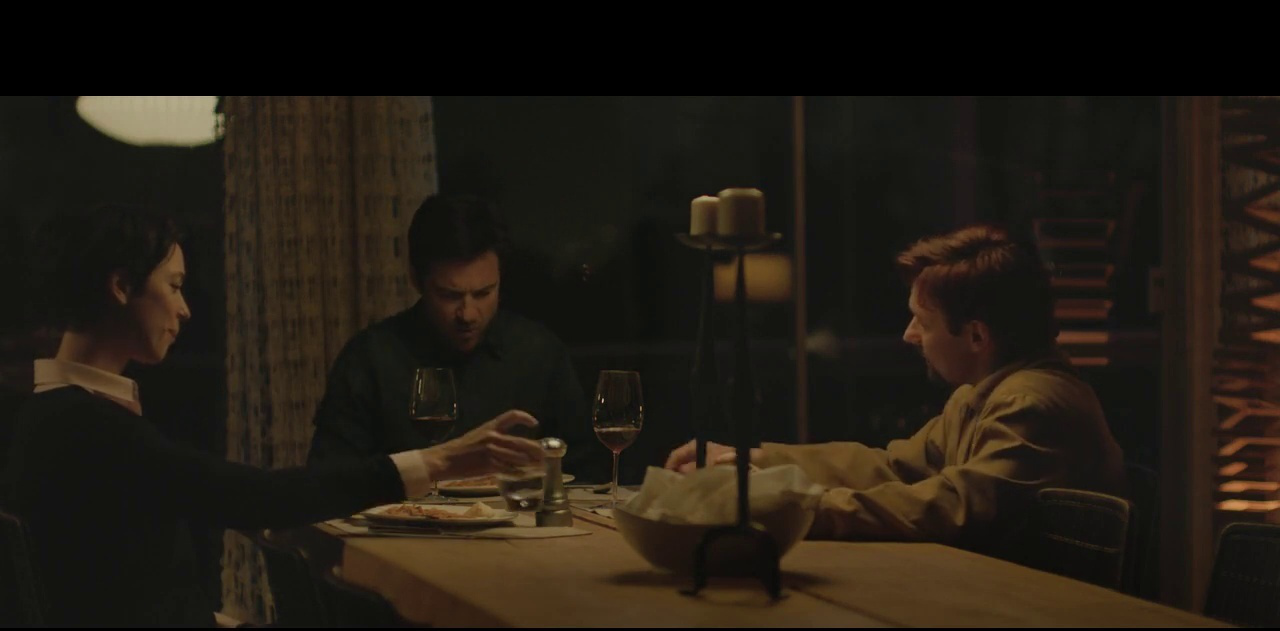

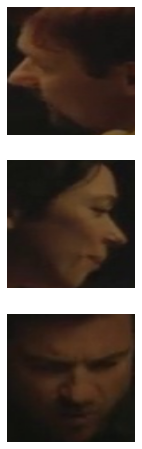

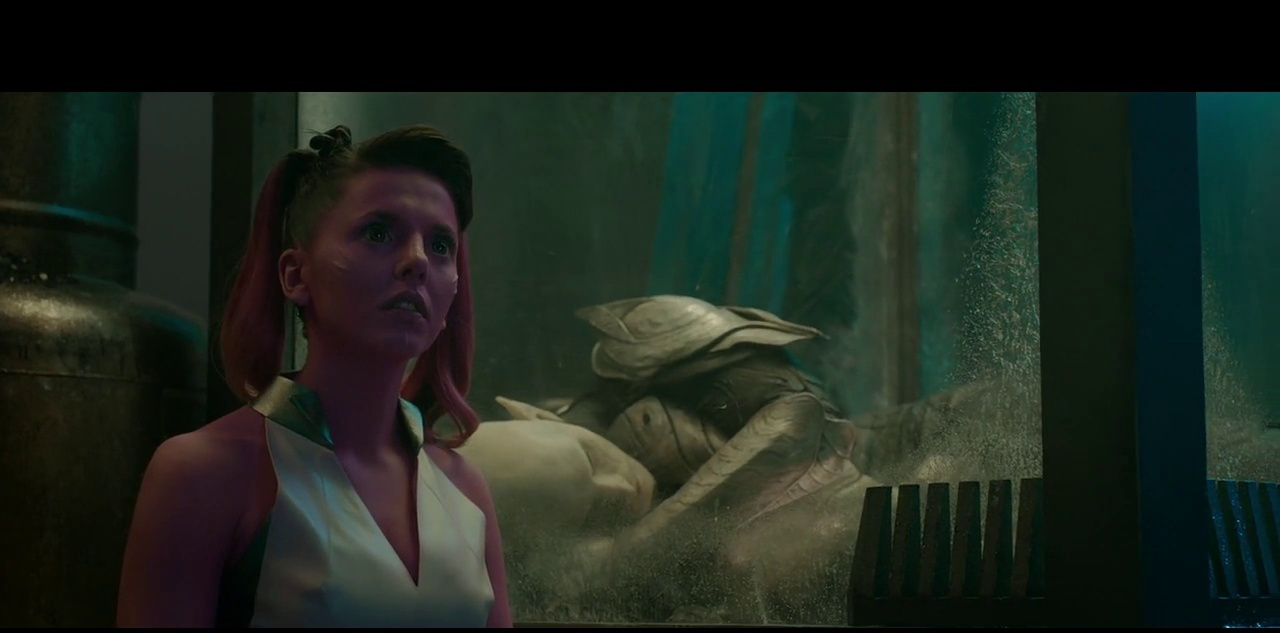

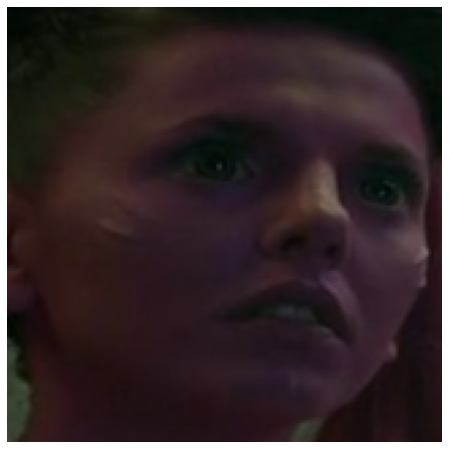

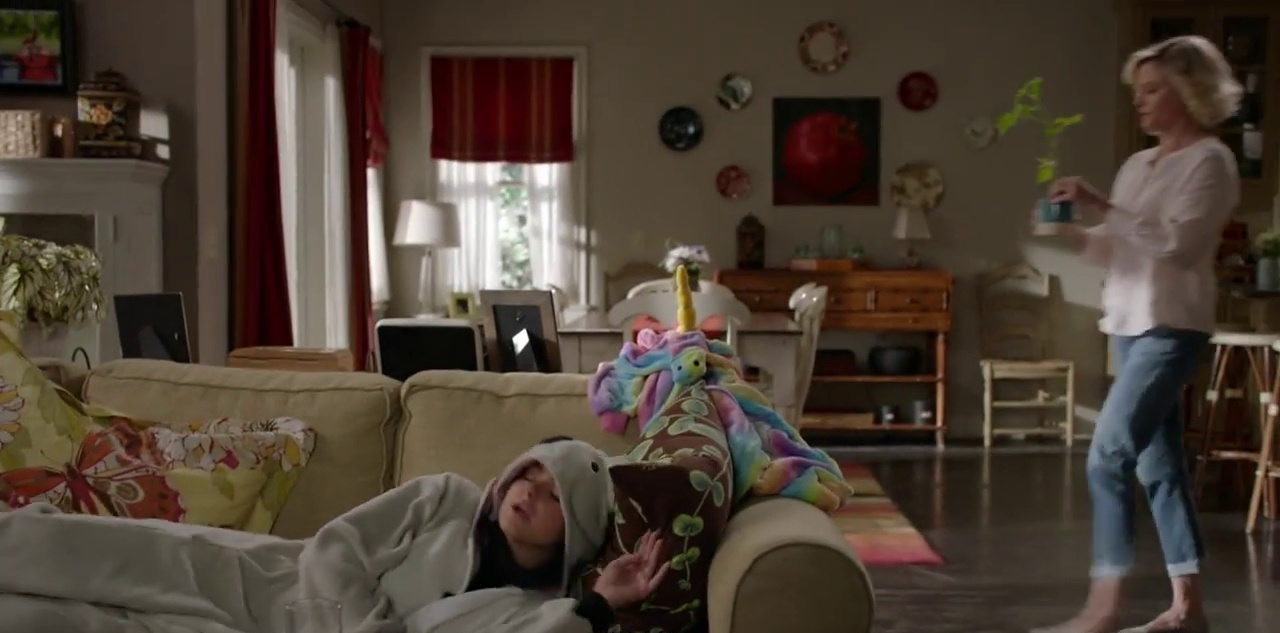

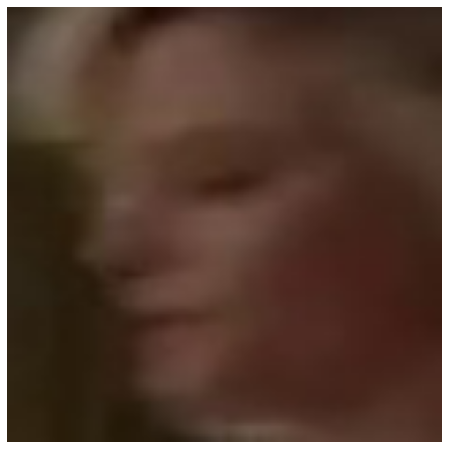

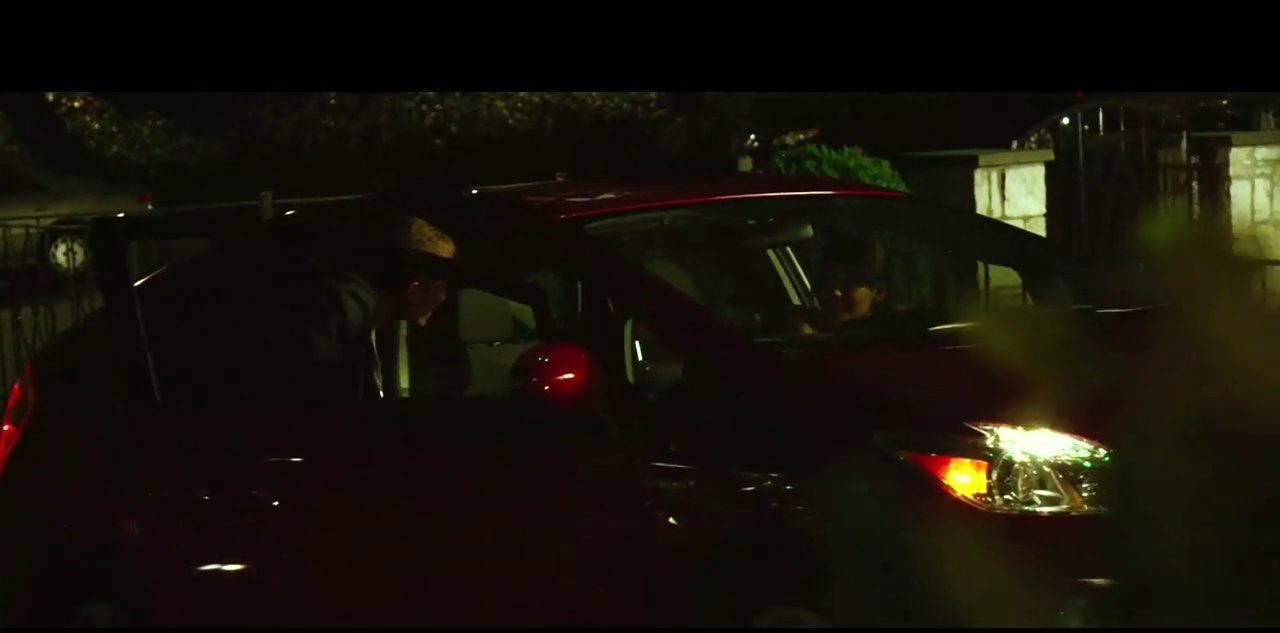

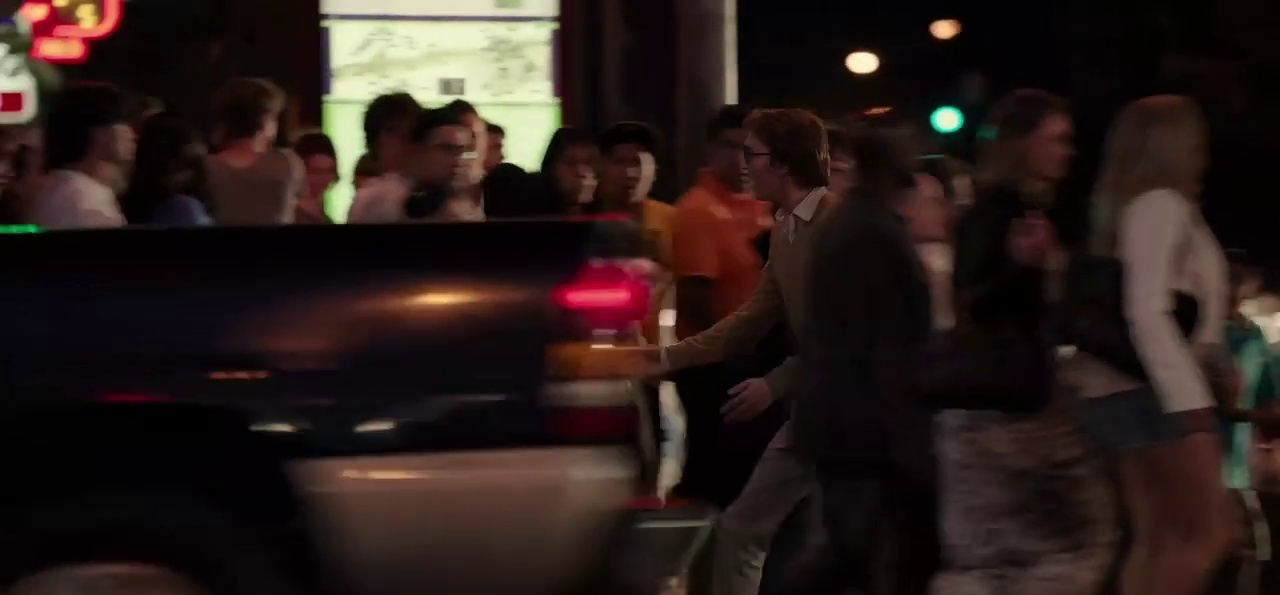

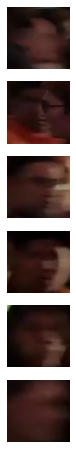

In [ ]:
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
import IPython.display as display

for i in torch.randint(len(training_data), (5,)).tolist():
      img=Image.fromarray(np.uint8((training_data[i]['images'].permute(1, 2, 0).numpy())*255).astype(np.uint8)).convert('RGB')
      display.display(img)
      mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device=device)
      faces = mtcnn(img)
      if faces==None:
        continue
      figure = plt.figure(figsize=(8, 8))
      cols, rows = 1, len(faces)
      for i, face in enumerate(faces):
          figure.add_subplot(rows, cols, i+1)
          plt.imshow(face.permute(1, 2, 0).int().numpy().astype(np.uint8))
          plt.axis("off")
      plt.show()

###Split Faces of Images With The Help of FaceNet Base on Number of Faces In Images  ###
In CNN model that will be used after FaceNet, We can use only images in which one face exists. The reason is that they are only images that we can be sure about sentiment labels.<br>
We used labels of Faces in images with more than one face for being inputs to Small Network (MLP) that its labels are sentiments of the relative images.<br>
Also, images without faces should be specified. These images will be labeld by categorial distribution with probablity distribution infered from histogram of sentiments, that we have derived in phase 0.<br> 

Therefore, we split all images to 2 categories(folders):<br>
1- 1_face_images : In this folder there are faces of images with one face in each<br>
2- couple_of_faces_images: In this folder there are folders that each of them is specifying a multiface image. In each of these folders, there are all faces existing in the relarive image.<br>
It is clear that we should do such split for training, developement and test dataset.<br><br>
We also created 3 data frames for each dataset:<br>
df_0_face: This data frame has 2 columns,'Image Number' and 'Sentiment', that shows index of the image in dataset and its sentiment respectively. <br>
df_1_face: Index of this data frame indactes file name in '1_face_images' folder and its column names are the same with 'df_0_face'.  <br>
df_1_face: Index of this data frame indactes folder name in 'couple_of_faces_images' folder and its column names are the same with 'df_0_face'. <br><br><br>
**Note: If you don't have time for splitting and making folders, you can skip 2 next cells and download the folders(in zip file format) and data frames(We splitted and uploaded on Google Drvie.).**



In [ ]:
import PIL 
import shutil
from pathlib import Path
def Face_Seperation(data,path_1_face,path_couple_of_faces):
    if Path(path_1_face).exists():
      shutil.rmtree(path_1_face)
    os.mkdir(path_1_face)     
    if Path(path_couple_of_faces).exists():
      shutil.rmtree(path_couple_of_faces)
    os.mkdir(path_couple_of_faces)      
    counter_1_face=0
    counter_couple_of_faces=0
    df_0_face = pd.DataFrame(columns=['Image Number', 'Sentiment'])
    df_1_face = pd.DataFrame(columns=['Image Number', 'Sentiment'])
    df_couple_of_faces = pd.DataFrame(columns=['Image Number', 'Sentiment'])
    if type(data[0]['images'])==torch.Tensor:
      for i in range(len(data)):
            img=Image.fromarray(np.uint8((data[i]['images'].permute(1, 2, 0).numpy())*255).astype(np.uint8)).convert('RGB')
            mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device=device)
            faces = mtcnn(img)
            if faces == None:
                df_0_face = df_0_face.append({'Image Number':i,'Sentiment':data[i]['sentiment']}, ignore_index=True)
                continue
            if len(faces)==1:       
                img=Image.fromarray(torch.squeeze(faces).permute(1, 2, 0).int().numpy().astype(np.uint8))
                img1 = transforms.Resize(size =(160,160))(img)
                img1 = img1.save(os.path.join(path_1_face ,str(counter_1_face)+'.jpg'))
                df_1_face = df_1_face.append({'Image Number':i,'Sentiment':data[i]['sentiment']}, ignore_index=True)
                counter_1_face+=1
            if len(faces)>1:
              path = os.path.join(path_couple_of_faces, str(counter_couple_of_faces))
              os.mkdir(path)
              for j, face in enumerate(faces):
                img=Image.fromarray(face.permute(1, 2, 0).int().numpy().astype(np.uint8))
                img1 = transforms.Resize(size =(160,160))(img)
                img1 = img1.save(os.path.join(path ,str(j)+'.jpg'))
              df_couple_of_faces = df_couple_of_faces.append({'Image Number':i,'Sentiment':data[i]['sentiment']}, ignore_index=True)
              counter_couple_of_faces+=1
    if type(data[0]['images'])==np.ndarray:
       for i in range(len(data)):
            img=Image.fromarray(data[i]['images']).convert('RGB')
            mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device=device)
            faces = mtcnn(img)
            if faces == None:
                df_0_face = df_0_face.append({'Image Number':i,'Sentiment':data[i]['sentiment']}, ignore_index=True)
                continue
            if len(faces)==1:       
                img=Image.fromarray(torch.squeeze(faces).permute(1, 2, 0).int().numpy().astype(np.uint8))
                img1 = transforms.Resize(size =(160,160))(img)
                img1 = img1.save(os.path.join(path_1_face ,str(counter_1_face)+'.jpg'))
                df_1_face = df_1_face.append({'Image Number':i,'Sentiment':data[i]['sentiment']}, ignore_index=True)
                counter_1_face+=1
            if len(faces)>1:
              path = os.path.join(path_couple_of_faces, str(counter_couple_of_faces))
              os.mkdir(path)
              for j, face in enumerate(faces):
                img=Image.fromarray(face.permute(1, 2, 0).int().numpy().astype(np.uint8))
                img1 = transforms.Resize(size =(160,160))(img)
                img1 = img1.save(os.path.join(path ,str(j)+'.jpg'))
              df_couple_of_faces = df_couple_of_faces.append({'Image Number':i,'Sentiment':data[i]['sentiment']}, ignore_index=True)
              counter_couple_of_faces+=1
    return df_0_face,df_1_face,df_couple_of_faces
      


In [ ]:
path_1_face_train = "1_face_images_train"    
path_couple_of_faces_train = "couple_of_faces_images_train"
(df_0_face_train,df_1_face_train,df_couple_of_faces_train)=Face_Seperation(training_data,path_1_face_train ,path_couple_of_faces_train)

path_1_face_dev = "1_face_images_dev"    
path_couple_of_faces_dev = "couple_of_faces_images_dev"
(df_0_face_dev,df_1_face_dev,df_couple_of_faces_dev)=Face_Seperation(dev_data,path_1_face_dev,path_couple_of_faces_dev)

path_1_face_test = "1_face_images_test"    
path_couple_of_faces_test = "couple_of_faces_images_test"
(df_0_face_test,df_1_face_test,df_couple_of_faces_test)=Face_Seperation(test_data,path_1_face_test,path_couple_of_faces_test)



###Download Splitted Faces of Images###
**If you didn't run 2 above cells because of using FaceNet over all datasets is time consuming, you can download it by running cells of this section.<br>
If you ran 2 above cells, you can skip this section.** 


In [ ]:
! if [ -d 1_face_images_train ]; then rm -rf 1_face_images_train ; fi
! if [ -d 1_face_images_dev ]; then rm -rf 1_face_images_dev ; fi
! if [ -d 1_face_images_test ]; then rm -rf 1_face_images_test ; fi

! if [ -d couple_of_faces_images_train ]; then rm -rf couple_of_faces_images_train ; fi
! if [ -d couple_of_faces_images_dev ]; then rm -rf couple_of_faces_images_dev ; fi
! if [ -d couple_of_faces_images_test ]; then rm -rf couple_of_faces_images_test ; fi

In [ ]:
!rm *.zip

!gdown --id 1e4LBGXGvkbCo7-3L1hkNUwBuDCRwJplx

!gdown --id 1-2UMl-wTX6d1MCyb0Q6an1D73Ol0mMlX

!gdown --id 1-KDM5v2CCONJ1EvlW7L_NDzQnAEimjZi

!gdown --id 1-8z1oYFGUwdxDOPX9GPnL8lrutlh_9CU

!gdown --id 1-M3_io89mtUJosLIYaexmh72LWB6Nylg

!gdown --id 1-V77YSMW9DXOHBu0E13l6_8o9SoXx9r1




/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1e4LBGXGvkbCo7-3L1hkNUwBuDCRwJplx
To: /content/1_face_images_train.zip
100% 32.5M/32.5M [00:01<00:00, 28.0MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-2UMl-wTX6d1MCyb0Q6an1D73Ol0mMlX
To: /content/couple_of_faces_images_train.zip
100% 58.2M/58.2M [00:02<00:00, 22.6MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
Fro

In [ ]:
%%bash
for z in *.zip; do unzip "$z"; done
rm *.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!mv content/* .
!rm -r content

In [ ]:

!gdown --id 1-gdM0XaxCCgLaakC1GLTe5YEYLA7rZ8a
!gdown --id 1-d82LhKyW53lzFO089OBhlRuOUCUscrI
!gdown --id 1-cMIzOv4Jeg9aO3nv0olnT73PgMFfmAr

!gdown --id 1-_qBP_xPOEMjqaK9L_E3H4uCa-DO0f4m
!gdown --id 1-_neaTczkDkU4_4W-e6e8-wOIVzHtYl8
!gdown --id 1-nNi6qbUDyEWGI4-4ZZWFfWyD8mE1ryr

!gdown --id 1-mL7s-RDB2RrvSD1TOJdyvPKp8kc_Vgl
!gdown --id 1-jDs3CYmfw0tLQkKFcVPIGHsDTf5t65D
!gdown --id 1-ihycdet4MgX19BsI2bLpQ0FPom_i4ie

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-gdM0XaxCCgLaakC1GLTe5YEYLA7rZ8a
To: /content/df_0_face_train.csv
100% 37.3k/37.3k [00:00<00:00, 37.5MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-d82LhKyW53lzFO089OBhlRuOUCUscrI
To: /content/df_1_face_train.csv
100% 129k/129k [00:00<00:00, 88.8MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.go

In [ ]:
df_0_face_train = pd.read_csv('df_0_face_train.csv',sep='\t', index_col=[0])
df_0_face_dev = pd.read_csv('df_0_face_dev.csv',sep='\t', index_col=[0])
df_0_face_test = pd.read_csv('df_0_face_test.csv',sep='\t', index_col=[0])

df_1_face_train = pd.read_csv('df_1_face_train.csv',sep='\t', index_col=[0])
df_1_face_dev = pd.read_csv('df_1_face_dev.csv',sep='\t', index_col=[0])
df_1_face_test = pd.read_csv('df_1_face_test.csv',sep='\t', index_col=[0])

df_couple_of_faces_train = pd.read_csv('df_couple_of_faces_train.csv',sep='\t', index_col=[0])
df_couple_of_faces_dev = pd.read_csv('df_couple_of_faces_dev.csv',sep='\t', index_col=[0])
df_couple_of_faces_test = pd.read_csv('df_couple_of_faces_test.csv',sep='\t', index_col=[0])



###CNN Model After FaceNet###

###Creating Dataset For Training,Development & Testing CNN Model###

In [ ]:

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class CNNDataset(Dataset):
    def __init__(self, path, df):
        self.path = path
        self.transform = transforms.Compose([transforms.Resize(160),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        self.df = df
    def __len__(self):
        return len(self.df.index)
    def __getitem__(self, idx):
        label = self.df['Sentiment'].loc[idx]
        data= self.transform(Image.open(os.path.join(self.path ,str(idx)+'.jpg')))
        sample = ( data, label)
        return sample

In [ ]:
CNN_training_data = CNNDataset('1_face_images_train',df_1_face_train)

In [ ]:
CNN_dev_data = CNNDataset('1_face_images_dev',df_1_face_dev)

In [ ]:
CNN_test_data = CNNDataset('1_face_images_test',df_1_face_test)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(training_data.random_seed)
class CNN_Network(nn.Module):
     def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.CNN = nn.Sequential(
            nn.Conv2d(3, 6, 7),
            nn.MaxPool2d(4, 4),
            nn.BatchNorm2d(6),

            nn.Dropout(p=0.6),
            nn.Conv2d(6, 12, 5),
            nn.MaxPool2d(3, 3),
            nn.BatchNorm2d(12),


        )
        self.linear_relu_stack = nn.Sequential(
            nn.Dropout(p=0.6),
            nn.Linear(1452 , 512),
            nn.LeakyReLU(),

            nn.Linear(512 , 3),


        )
     def forward(self, x):
        x = self.CNN(x)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
torch.manual_seed(training_data.random_seed)
CNN_Model = CNN_Network().to(device)
X = torch.rand(1, 3, 160, 160, device=device)
logits =CNN_Model(X)
print(f"Model's output: \n {logits} \n")

# calculating model predictions by applying a softmax
probs = nn.Softmax(dim=1)(logits) # finding the probabilities
print(f"Prediction probabilities: \n {probs} \n")

y_pred = probs.argmax(dim = 1)
print(f"Predicted label: \n {y_pred.item()} \n")

Model's output: 
 tensor([[ 0.1950, -0.0690,  0.1195]], device='cuda:0',
       grad_fn=<AddmmBackward0>) 

Prediction probabilities: 
 tensor([[0.3710, 0.2849, 0.3440]], device='cuda:0', grad_fn=<SoftmaxBackward0>) 

Predicted label: 
 0 



In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        model.train()
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            model.eval()
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

In [ ]:
torch.manual_seed(training_data.random_seed)
CNN_train_dataloader = DataLoader(CNN_training_data, batch_size=16, shuffle=True)
CNN_dev_dataloader = DataLoader(CNN_dev_data, batch_size=16, shuffle=False)
CNN_test_dataloader = DataLoader(CNN_test_data, batch_size=16, shuffle=False)

###Training CNN Networks###
If you don't have time, you can skip this section and download the best model.

In [ ]:
torch.manual_seed(training_data.random_seed)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
epochs = 10
CNN_Model.to(device)
optimizer = torch.optim.Adam(CNN_Model.parameters(), lr=learning_rate)
dev_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(CNN_train_dataloader, CNN_Model, loss_fn, optimizer)
    dev_accuracy.append(test_loop(CNN_dev_dataloader, CNN_Model, loss_fn))
    if np.argmax(dev_accuracy)==len(dev_accuracy)-1:
      torch.save(CNN_Model, 'CNN_Model.pth')
print("Done!")


Epoch 1
-------------------------------
loss: 1.119275  [    0/10409]
loss: 1.231710  [ 1600/10409]
loss: 1.161134  [ 3200/10409]
loss: 1.156454  [ 4800/10409]
loss: 1.029992  [ 6400/10409]
loss: 1.211554  [ 8000/10409]
loss: 1.077168  [ 9600/10409]
Test Error: 
 Accuracy: 36.9%, Avg loss: 1.102146 

Epoch 2
-------------------------------
loss: 1.107296  [    0/10409]
loss: 1.135148  [ 1600/10409]
loss: 1.046384  [ 3200/10409]
loss: 1.125544  [ 4800/10409]
loss: 0.977889  [ 6400/10409]
loss: 1.104392  [ 8000/10409]
loss: 1.159364  [ 9600/10409]
Test Error: 
 Accuracy: 37.7%, Avg loss: 1.093214 

Epoch 3
-------------------------------
loss: 1.084254  [    0/10409]
loss: 1.016281  [ 1600/10409]
loss: 1.107594  [ 3200/10409]
loss: 1.091529  [ 4800/10409]
loss: 1.046550  [ 6400/10409]
loss: 1.101873  [ 8000/10409]
loss: 1.169977  [ 9600/10409]
Test Error: 
 Accuracy: 36.9%, Avg loss: 1.096023 

Epoch 4
-------------------------------
loss: 1.033132  [    0/10409]
loss: 1.089767  [ 1600/1

###Download The Best CNN Model###
If you ran above section, there is no need to run next cell.

In [ ]:
!gdown --id 1W-bFHAYgGzW4gpx_btGvQRCtEwKxfdKz

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W-bFHAYgGzW4gpx_btGvQRCtEwKxfdKz
To: /content/CNN_Model.pth
100% 3.00M/3.00M [00:00<00:00, 271MB/s]


###Evaluation of The Best CNN Model on Test Data###
The model with the highest accuracy on the Dev Data is the best.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
CNN_Model = torch.load('CNN_Model.pth')
test_loop(CNN_test_dataloader, CNN_Model, loss_fn)

Test Error: 
 Accuracy: 43.6%, Avg loss: 1.094537 



0.4361856417693981

###Small Network For Determining Label of MultiFace Images###

In [ ]:
class SmallNetworkDataset(Dataset):
    def __init__(self, path, df):
        self.path = path
        self.df = df
    def __len__(self):
        return len(self.df.index)
    def __getitem__(self, idx):
        label = self.df['Sentiment'].loc[idx]
        path_idx = os.path.join(self.path, str(idx))
        for Face_Counter,Face_Num in enumerate(os.listdir(path_idx)):
          img_tensor = CNN_training_data.transform(Image.open(os.path.join(path_idx ,Face_Num)))
          img_tensor = img_tensor.unsqueeze(dim=0)
          img_tensor = img_tensor.to(device)
          CNN_Model.eval()
          logits = CNN_Model(img_tensor)
          probs = nn.Softmax(dim=1)(logits)
          if Face_Counter==0:
            data = F.one_hot(torch.max(probs, 1).indices, num_classes=3)
            continue
          data = data + F.one_hot(torch.max(probs, 1).indices, num_classes=3)
        data = torch.squeeze(data)  
        sample = (data.type(torch.float), label)
        return sample

In [ ]:
SmallNetwork_training_data = SmallNetworkDataset('couple_of_faces_images_train',df_couple_of_faces_train)

In [ ]:
SmallNetwork_dev_data = SmallNetworkDataset('couple_of_faces_images_dev',df_couple_of_faces_dev)

In [ ]:
SmallNetwork_test_data = SmallNetworkDataset('couple_of_faces_images_test',df_couple_of_faces_test)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class SmallNetwork_Network(nn.Module):
     def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(3 , 10),
            nn.ReLU(),
            nn.Linear(10 , 3),


        )
     def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
torch.manual_seed(training_data.random_seed)
SmallNetwork_Model = SmallNetwork_Network().to(device)
X = torch.rand(1,3, device=device)
logits =SmallNetwork_Model(X)
print(f"Model's output: \n {logits} \n")

# calculating model predictions by applying a softmax
probs = nn.Softmax(dim=1)(logits) # finding the probabilities
print(f"Prediction probabilities: \n {probs} \n")

y_pred = probs.argmax(dim = 1)
print(f"Predicted label: \n {y_pred.item()} \n")

Model's output: 
 tensor([[ 0.4216, -0.0741,  0.2503]], device='cuda:0',
       grad_fn=<AddmmBackward0>) 

Prediction probabilities: 
 tensor([[0.4079, 0.2485, 0.3437]], device='cuda:0', grad_fn=<SoftmaxBackward0>) 

Predicted label: 
 0 



In [ ]:
torch.manual_seed(training_data.random_seed)
SmallNetwork_train_dataloader = DataLoader(SmallNetwork_training_data, batch_size=16, shuffle=True)
SmallNetwork_dev_dataloader = DataLoader(SmallNetwork_dev_data, batch_size=16, shuffle=False)
SmallNetwork_test_dataloader = DataLoader(SmallNetwork_test_data, batch_size=16, shuffle=False)

###Training Small Network###
If you don't have time, you can skip this section and download the best model.

In [ ]:
torch.manual_seed(training_data.random_seed)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
epochs = 5
optimizer = torch.optim.Adam(SmallNetwork_Model.parameters(), lr=learning_rate)
dev_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(SmallNetwork_train_dataloader, SmallNetwork_Model, loss_fn, optimizer)
    dev_accuracy.append(test_loop(SmallNetwork_dev_dataloader, SmallNetwork_Model, loss_fn))
    torch.save(SmallNetwork_Model, 'SmallNetwork_Model.pth')
print("Done!")


Epoch 1
-------------------------------
loss: 1.218276  [    0/ 6766]
loss: 1.100713  [ 1600/ 6766]
loss: 1.147898  [ 3200/ 6766]
loss: 1.122362  [ 4800/ 6766]
loss: 1.197587  [ 6400/ 6766]
Test Error: 
 Accuracy: 37.5%, Avg loss: 1.097112 

Epoch 2
-------------------------------
loss: 1.078912  [    0/ 6766]
loss: 1.109014  [ 1600/ 6766]
loss: 1.099827  [ 3200/ 6766]
loss: 1.062034  [ 4800/ 6766]
loss: 1.072585  [ 6400/ 6766]
Test Error: 
 Accuracy: 34.1%, Avg loss: 1.100700 

Epoch 3
-------------------------------
loss: 1.130668  [    0/ 6766]
loss: 1.087749  [ 1600/ 6766]
loss: 1.083133  [ 3200/ 6766]
loss: 1.090661  [ 4800/ 6766]
loss: 1.127187  [ 6400/ 6766]
Test Error: 
 Accuracy: 34.3%, Avg loss: 1.095081 

Epoch 4
-------------------------------
loss: 1.071301  [    0/ 6766]
loss: 1.147108  [ 1600/ 6766]
loss: 1.115726  [ 3200/ 6766]
loss: 1.101888  [ 4800/ 6766]
loss: 1.108400  [ 6400/ 6766]
Test Error: 
 Accuracy: 34.4%, Avg loss: 1.094733 

Epoch 5
------------------------

###Download The Best Small Networks Model###
If you ran above section, there is no need to run next cell.

In [ ]:
!gdown --id 1---pIslOjpkN-QjVJaI4FJExwYCXmMr9

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1---pIslOjpkN-QjVJaI4FJExwYCXmMr9
To: /content/SmallNetwork_Model.pth
100% 3.36k/3.36k [00:00<00:00, 7.39MB/s]


###Evaluation of The Best Small Networks Model on Test Data###


In [ ]:
SmallNetwork_Model = torch.load('SmallNetwork_Model.pth')
test_loop(SmallNetwork_test_dataloader, SmallNetwork_Model, loss_fn)

Test Error: 
 Accuracy: 39.9%, Avg loss: 1.099119 



0.3992953611274222

###Coupled Network###
Now,we are connecting two networks (Face Net & CNN).<br>
We also used Small Network for images that Face Net identified as multiface images.<BR>
Finally, for images without face, we choose randomly one of the labels based on the histogram of sentiments that we plot in Phase 0.

In [ ]:
def Coupled_Network_test_loop(data, CNN_Model, SmallNetwork_Model):
    correct = 0
    if len(data)==len(training_data):
        labels=training_data.df_sentiment[0].value_counts().index
        values=training_data.df_sentiment[0].value_counts().values
        categorial_random_generator = torch.distributions.Categorical(torch.from_numpy (values[labels]/sum(values[labels])).type(torch.float))

    if len(data)==len(dev_data):
        labels=dev_data.df_sentiment[0].value_counts().index
        values=dev_data.df_sentiment[0].value_counts().values
        categorial_random_generator = torch.distributions.Categorical(torch.from_numpy (values[labels]/sum(values[labels])).type(torch.float))

    if len(data)==len(test_data):
        labels=test_data.df_sentiment[0].value_counts().index
        values=test_data.df_sentiment[0].value_counts().values
        categorial_random_generator = torch.distributions.Categorical(torch.from_numpy(values[labels]/sum(values[labels])).type(torch.float))

    with torch.no_grad():
            CNN_Model.eval()
            SmallNetwork_Model.eval()
            if type(data[0]['images'])==torch.Tensor:  
                for i in range(len(data)):
                      img=Image.fromarray(np.uint8((data[i]['images'].permute(1, 2, 0).numpy())*255).astype(np.uint8)).convert('RGB')
                      mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device=device)
                      faces = mtcnn(img)

                      if faces == None:
                          correct += float(categorial_random_generator.sample().to(device).item() == data[i]['sentiment'])
                          continue
     
                      if len(faces)==1:       
                          logits = CNN_Model(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(faces).to(device))
                          logits =SmallNetwork_Model(X)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

                      if len(faces)>1:
                          for Face_Counter, Face in enumerate(faces):
                            logits = CNN_Model(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(Face).unsqueeze(dim=0).to(device))
                            if Face_Counter==0:
                              SmallNetwork_data = F.one_hot(torch.max(logits, 1).indices, num_classes=3)
                              continue
                            SmallNetwork_data =  SmallNetwork_data + F.one_hot(torch.max(probs, 1).indices, num_classes=3)
                          SmallNetwork_data =  SmallNetwork_data.type(torch.float)
                          logits = SmallNetwork_Model(SmallNetwork_data)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

            if type(data[0]['images'])==np.ndarray:
                for i in range(len(data)):
                      img=Image.fromarray(data[i]['images']).convert('RGB')
                      mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device=device)
                      faces = mtcnn(img)
                      if faces == None:
                          correct += float(categorial_random_generator.sample().to(device).item() == data[i]['sentiment'])
                          continue
     
                      if len(faces)==1:       
                          logits = CNN_Model(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(faces).to(device))
                          logits =SmallNetwork_Model(X)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])
                      if len(faces)>1:
                          for Face_Counter, Face in enumerate(faces):
                            logits = CNN_Model(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(Face).unsqueeze(dim=0).to(device))
                            if Face_Counter==0:
                              SmallNetwork_data = F.one_hot(torch.max(logits, 1).indices, num_classes=3)
                              continue
                            SmallNetwork_data =  SmallNetwork_data + F.one_hot(torch.max(probs, 1).indices, num_classes=3)
                          SmallNetwork_data =  SmallNetwork_data.type(torch.float)
                          logits = SmallNetwork_Model(SmallNetwork_data)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

    correct /= len(data)
    return correct

###Evaluation of Coupled Network on Test Data###

In [ ]:
print(f'Accuracy On The Test Data: {(100*Coupled_Network_test_loop(test_data, CNN_Model, SmallNetwork_Model)):>0.1f}%')

Accuracy On The Test Data: 40.5%


##Subsection 2##

###Prime Augmentation###
We used the code in https://github.com/amodas/PRIME-augmentations in this section.

In [ ]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
from einops import parse_shape, rearrange


class RandomFilter(torch.nn.Module):
    def __init__(self, kernel_size, sigma, stochastic=False, sigma_min=0.):
        super().__init__()
        self.kernel_size = kernel_size
        self.sigma = sigma

        self.stochastic = stochastic
        if self.stochastic:
            self.kernels_size_candidates = torch.tensor([float(i) for i in range(self.kernel_size, self.kernel_size + 2, 2)])
            self.sigma_min = sigma_min
            self.sigma_max = sigma

    def forward(self, img):
        if self.stochastic:
            self._sample_params()

        init_shape = img.shape
        if len(init_shape) < 4:
            img = rearrange(img, "c h w -> () c h w")

        shape_dict = parse_shape(img, "b c h w")
        batch_size = shape_dict["b"]
        img = rearrange(img, "b c h w -> c b h w")

        delta = torch.zeros((1, self.kernel_size, self.kernel_size), device=img.device)
        center = int(np.ceil(self.kernel_size / 2))
        delta[0, center, center] = 1.0

        conv_weight = rearrange(
            self.sigma * torch.randn((batch_size, self.kernel_size, self.kernel_size), device=img.device) + delta,
            "b h w -> b (h w)",
        )

        conv_weight = rearrange(conv_weight, "b (h w) -> b () h w", h=self.kernel_size)

        filtered_img = torch.nn.functional.conv2d(
            img, conv_weight, padding="same", groups=batch_size
        )

        # Deal with NaN values due to mixed precision -> Convert them to 1.
        filtered_img[filtered_img.isnan()] = 1.

        filtered_img = rearrange(filtered_img, "c b h w -> b c h w")
        filtered_img = torch.clamp(filtered_img, 0., 1.).reshape(init_shape)

        return filtered_img

    def _sample_params(self):
        self.kernel_size = int(self.kernels_size_candidates[torch.multinomial(self.kernels_size_candidates, 1)].item())
        self.sigma = torch.FloatTensor([1]).uniform_(self.sigma_min, self.sigma_max).item()

    def __repr__(self):
        return self.__class__.__name__ + f"(sigma={self.sigma}, kernel_size={self.kernel_size})"



In [ ]:
import functools
import math
import torch
from einops import rearrange
from opt_einsum import contract


class Diffeo(torch.nn.Module):
    """Randomly apply a diffeomorphism to the image(s).
    The image should be a Tensor and it is expected to have [..., n, n] shape,
    where ... means an arbitrary number of leading dimensions.

    A random cut is drawn from a discrete Beta distribution of parameters
    alpha and beta such that
        s = alpha + beta (measures how peaked the distribution is)
        r = alpha / beta (measured how biased towards cutmax the distribution is)

    Given cut and the allowed* interval of temperatures [Tmin, Tmax], a random T is
    drawn from a Beta distribution with parameters alpha and beta such that:
        s = alpha + beta (measures how peaked the distribution is)
        r = alpha / beta (measured how biased towards T_max the distribution is)
    Beta ~ delta_function for s -> inf. To apply a specific value x \in [0, 1]
    in the allowed interval of T or cut, set
        - s = 1e10
        - r = x / (1 - x)
    *the allowed T interval is defined such as:
        - Tmin corresponds to a typical displacement of 1/2 pixel in the center
          of the image
        - Tmax corresponds to the highest T for which no overhangs are present.
    Args:
        sT (float):
        rT (float):
        scut (float):
        rcut (float):
        cut_min (int):
        cut_max (int):

    Returns:
        Tensor: Diffeo version of the input image(s).
    """

    def __init__(self, sT, rT, scut, rcut, cutmin, cutmax, alpha, stochastic=False):
        super().__init__()

        self.sT = sT
        self.rT = rT
        self.scut = scut
        self.rcut = rcut
        self.cutmin = cutmin
        self.cutmax = cutmax
        self.alpha = alpha

        self.stochastic = stochastic
        if self.stochastic:
            self.cutmax_max = cutmax
            self.alpha_max = alpha

        self.betaT = torch.distributions.beta.Beta(sT - sT / (rT + 1), sT / (rT + 1), validate_args=None)
        self.betacut = torch.distributions.beta.Beta(scut - scut / (rcut + 1), scut / (rcut + 1), validate_args=None)

    def forward(self, img):
        """
        Args:
            img (Tensor): Image(s) to be 'diffeomorphed'.
        Returns:
            Tensor: Diffeo image(s).
        """

        init_shape = img.shape
        if len(init_shape) < 4:
            img = rearrange(img, "c h w -> () c h w")

        if self.stochastic:
            self._sample_params()

        # image size
        n = img.shape[-1]

        cut = (self.betacut.sample() * (self.cutmax + 1 - self.cutmin) + self.cutmin).int().item()
        T1, T2 = temperature_range(n, cut)
        T2 = max(T1, self.alpha * T2)
        T = (self.betaT.sample() * (T2 - T1) + T1)

        return deform(img, T, cut).reshape(init_shape)

    def _sample_params(self):
        self.cutmax = torch.randint(low=self.cutmin + 1, high=self.cutmax_max + 1, size=(1,)).item()
        # self.alpha = torch.FloatTensor([1]).uniform_(0., self.alpha_max).item()

    def __repr__(self):
        return self.__class__.__name__ + f'(sT={self.sT}, rT={self.rT}, scut={self.scut}, rcut={self.rcut}, cutmin={self.cutmin}, cutmax={self.cutmax})'



@functools.lru_cache()
def scalar_field_modes(n, m, dtype=torch.float64, device='cpu'):
    """
    sqrt(1 / Energy per mode) and the modes
    """
    x = torch.linspace(0, 1, n, dtype=dtype, device=device)
    k = torch.arange(1, m + 1, dtype=dtype, device=device)
    i, j = torch.meshgrid(k, k)
    r = (i.pow(2) + j.pow(2)).sqrt()
    e = (r < m + 0.5) / r
    s = torch.sin(math.pi * x[:, None] * k[None, :])
    return e, s


def scalar_field(n, m, device='cpu'):
    """
    random scalar field of size nxn made of the first m modes
    """
    e, s = scalar_field_modes(n, m, dtype=torch.get_default_dtype(), device=device)
    c = torch.randn(m, m, device=device) * e
    # return torch.einsum('ij,xi,yj->yx', c, s, s)
    return contract('ij,xi,yj->yx', c, s, s)


def deform(image, T, cut, interp='linear'):
    """
    1. Sample a displacement field tau: R2 -> R2, using tempertature `T` and cutoff `cut`
    2. Apply tau to `image`
    :param img Tensor: square image(s) [..., y, x]
    :param T float: temperature
    :param cut int: high frequency cutoff
    """
    n = image.shape[-1]
    assert image.shape[-2] == n, 'Image(s) should be square.'

    device = image.device

    # Sample dx, dy
    # u, v are defined in [0, 1]^2
    # dx, dx are defined in [0, n]^2
    u = scalar_field(n, cut, device)  # [n,n]
    v = scalar_field(n, cut, device)  # [n,n]
    dx = T ** 0.5 * u * n
    dy = T ** 0.5 * v * n

    # Apply tau
    return remap(image, dx, dy, interp)


def remap(a, dx, dy, interp):
    """
    :param a: Tensor of shape [..., y, x]
    :param dx: Tensor of shape [y, x]
    :param dy: Tensor of shape [y, x]
    :param interp: interpolation method
    """
    n, m = a.shape[-2:]
    assert dx.shape == (n, m) and dy.shape == (n, m), 'Image(s) and displacement fields shapes should match.'

    y, x = torch.meshgrid(torch.arange(n, dtype=dx.dtype, device=a.device), torch.arange(m, dtype=dx.dtype, device=a.device))

    xn = (x - dx).clamp(0, m-1)
    yn = (y - dy).clamp(0, n-1)

    if interp == 'linear':
        xf = xn.floor().long()
        yf = yn.floor().long()
        xc = xn.ceil().long()
        yc = yn.ceil().long()

        xv = xn - xf
        yv = yn - yf

        return (1-yv)*(1-xv)*a[..., yf, xf] + (1-yv)*xv*a[..., yf, xc] + yv*(1-xv)*a[..., yc, xf] + yv*xv*a[..., yc, xc]

    if interp == 'gaussian':
        # can be implemented more efficiently by adding a cutoff to the Gaussian
        sigma = 0.4715

        dx = (xn[:, :, None, None] - x)
        dy = (yn[:, :, None, None] - y)

        c = (-dx**2 - dy**2).div(2 * sigma**2).exp()
        c = c / c.sum([2, 3], keepdim=True)

        return (c * a[..., None, None, :, :]).sum([-1, -2])


def temperature_range(n, cut):
    """
    Define the range of allowed temperature
    for given image size and cut.
    """
    if cut == 0:
        print("Cut is zero!")
    if isinstance(cut, (float, int)):
        cut = cut + 1e-6
        log = math.log(cut)
    else:
        log = cut.log()
    T1 = 1 / (math.pi * n ** 2 * log)
    T2 = 4 / (math.pi ** 3 * cut ** 2 * log)
    return T1, T2


def typical_displacement(T, cut, n):
    if isinstance(cut, (float, int)):
        log = math.log(cut)
    else:
        log = cut.log()
    return n * (math.pi * T * log) ** .5 / 2

In [ ]:
import math

import torch
from einops import parse_shape, rearrange
from opt_einsum import contract


class RandomSmoothColor(torch.nn.Module):
    def __init__(self, cut, T, freq_bandwidth=None, stochastic=False, T_min=0.):
        super().__init__()
        self.cut = cut
        self.T = T
        self.freq_bandwidth = freq_bandwidth
        
        self.stochastic = stochastic
        if self.stochastic:
            self.cut_max = cut
            self.T_min = T_min
            self.T_max = T

    def forward(self, img):

        if self.stochastic:
            self._sample_params()

        init_shape = img.shape
        if len(init_shape) < 4:
            img = rearrange(img, "c h w -> () c h w")

        return self.random_smooth_color(img, self.cut, self.T, self.freq_bandwidth).reshape(init_shape)

    def _sample_params(self):
        self.cut = torch.randint(low=1, high=self.cut_max + 1, size=(1,)).item()
        self.T = torch.FloatTensor([1]).uniform_(self.T_min, self.T_max).item()

    def random_smooth_color(self, img, cut, T, freq_bandwidth=None):
        img_shape = parse_shape(img, "b c h w")
        colors = rearrange(img, "b c h w -> b c (h w)")

        if freq_bandwidth is not None:
            min_k = torch.randint(low=1, high=cut + 1, size=(1,)).item()
            k = torch.arange(
                min_k, min(min_k + freq_bandwidth, cut + 1), 
                device=img.device
            )
            coeff = torch.randn(
                (img_shape["b"], img_shape["c"], k.shape[0]), 
                device=img.device
            )
        else:
            coeff = torch.randn(
                (img_shape["b"], img_shape["c"], cut), 
                device=img.device
            )
            k = torch.arange(1, cut + 1, device=img.device)

        coeff = coeff * torch.sqrt(torch.tensor(T))

        freqs = torch.sin(colors[..., None] * k[None, None, None, :] * math.pi)

        # transformed_colors = torch.einsum("bcf,bcnf->bcn", coeff, freqs) + colors
        transformed_colors = contract("bcf, bcnf -> bcn", coeff, freqs) + colors
        transformed_colors = torch.clamp(transformed_colors, 0, 1)

        transformed_image = rearrange(transformed_colors, " b c (h w) -> b c h w", **img_shape)
        return transformed_image

    def __repr__(self):
        return self.__class__.__name__ + f"(T={self.T}, cut={self.cut})"


In [ ]:
diffeo = Diffeo(1., 1., 1., 1., 2, 500, 1.0 )
random_color = RandomSmoothColor(500, 0.05, 20)
random_filter = RandomFilter(3,  4.0)

In [ ]:
augmentations = [
    diffeo,
    random_color,
    random_filter,
]

In [ ]:
import torch

from torch.distributions import Dirichlet, Beta
from einops import rearrange, repeat
from opt_einsum import contract


class PRIMEAugModule(torch.nn.Module):
    def __init__(self, augmentations):
        super().__init__()
        self.augmentations = augmentations
        self.num_transforms = len(augmentations)

    def forward(self, x, mask_t):
        aug_x = torch.zeros_like(x)
        for i in range(self.num_transforms):
            aug_x += self.augmentations[i](x) * mask_t[:, i]
        return aug_x

class GeneralizedPRIMEModule(torch.nn.Module):
    def __init__(
        self, preprocess, aug_module, mixture_width=3, 
        mixture_depth=-1, no_jsd=False, max_depth=3
    ):
        """
        Wrapper to perform PRIME augmentation.

        :param preprocess: Preprocessing function which should return a torch tensor
        :param all_ops: Weather to use all augmentation operations (including the forbidden ones such as brightness)
        :param mixture_width: Number of augmentation chains to mix per augmented example
        :param mixture_depth: Depth of augmentation chains. -1 denotes stochastic depth in [1, 3]
        :param no_jsd: Turn off JSD consistency loss
        """
        super().__init__()
        self.preprocess = preprocess
        self.aug_module = aug_module
        self.mixture_width = mixture_width
        self.mixture_depth = mixture_depth
        self.no_jsd = no_jsd

        self.max_depth = max_depth
        self.depth = self.mixture_depth if self.mixture_depth > 0 else self.max_depth
        self.depth_combos = torch.tril(torch.ones((max_depth, max_depth)))

    @torch.no_grad()
    def forward(self, img):
        if self.no_jsd:
            return self.aug(img)
        else:
            return torch.cat((self.preprocess(img), self.aug(img),
                              self.aug(img)), 0)

    
    def aug(self, img):
        self.dirichlet = Dirichlet(concentration=torch.tensor([1.] * self.mixture_width, device=img.device))
        self.beta = Beta(concentration1=torch.ones(1, device=img.device, dtype=torch.float32), concentration0=torch.ones(1, device=img.device, dtype=torch.float32))

        ws = self.dirichlet.sample([img.shape[0]])
        m = self.beta.sample([img.shape[0]])[..., None, None]

        img_repeat = repeat(img, 'b c h w -> m b c h w', m=self.mixture_width)
        img_repeat = rearrange(img_repeat, 'm b c h w -> (m b) c h w')

        trans_combos = torch.eye(self.aug_module.num_transforms, device=img_repeat.device)
        depth_mask = torch.zeros(img_repeat.shape[0], self.max_depth, 1, 1, 1, device=img_repeat.device)
        trans_mask = torch.zeros(img_repeat.shape[0], self.aug_module.num_transforms, 1, 1, 1, device=img_repeat.device)

        depth_idx = torch.randint(0, len(self.depth_combos), size=(img_repeat.shape[0],))
        depth_mask.data[:, :, 0, 0, 0] = self.depth_combos[depth_idx]

        image_aug = img_repeat.clone()

        for d in range(self.depth):

            trans_idx = torch.randint(0, len(trans_combos), size=(img_repeat.shape[0],))
            trans_mask.data[:, :, 0, 0, 0] = trans_combos[trans_idx]

            image_aug.data = depth_mask[:, d] * self.aug_module(image_aug, trans_mask) + (1. - depth_mask[:, d]) * image_aug

        image_aug = rearrange(self.preprocess(image_aug), '(m b) c h w -> m b c h w', m=self.mixture_width)

        mix = torch.einsum('bm, mbchw -> bchw', ws, image_aug)
        mixed = (1. - m) * self.preprocess(img) + m * mix
        return mixed


In [ ]:
prime_module = PRIMEAugModule(augmentations)
generalized_prime_module_test = GeneralizedPRIMEModule(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),prime_module, no_jsd=True)
generalized_prime_module_train = GeneralizedPRIMEModule(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),prime_module)

###Accuracy of Coupled Network (trained on the unaugmented data) On The Augmented Test Data###

In [ ]:
def Coupled_Network_Augmented_test_loop(data, CNN_Model, SmallNetwork_Model):
    correct = 0
    if len(data)==len(training_data):
        labels=training_data.df_sentiment[0].value_counts().index
        values=training_data.df_sentiment[0].value_counts().values
        categorial_random_generator = torch.distributions.Categorical(torch.from_numpy (values[labels]/sum(values[labels])).type(torch.float))

    if len(data)==len(dev_data):
        labels=dev_data.df_sentiment[0].value_counts().index
        values=dev_data.df_sentiment[0].value_counts().values
        categorial_random_generator = torch.distributions.Categorical(torch.from_numpy (values[labels]/sum(values[labels])).type(torch.float))

    if len(data)==len(test_data):
        labels=test_data.df_sentiment[0].value_counts().index
        values=test_data.df_sentiment[0].value_counts().values
        categorial_random_generator = torch.distributions.Categorical(torch.from_numpy(values[labels]/sum(values[labels])).type(torch.float))

    with torch.no_grad():
            CNN_Model.eval()
            SmallNetwork_Model.eval()
            if type(data[0]['images'])==torch.Tensor:  
                for i in range(len(data)):
                      img=Image.fromarray(np.uint8((data[i]['images'].permute(1, 2, 0).numpy())*255).astype(np.uint8)).convert('RGB')
                      mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device=device)
                      faces = mtcnn(img)

                      if faces == None:
                          correct += float(categorial_random_generator.sample().to(device).item() == data[i]['sentiment'])
                          continue
     
                      if len(faces)==1:       
                          generalized_prime_module_test
                          logits = CNN_Model(generalized_prime_module_test(faces).to(device))
                          logits =SmallNetwork_Model(X)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

                      if len(faces)>1:
                          for Face_Counter, Face in enumerate(faces):
                            logits = CNN_Model(generalized_prime_module_test(Face.unsqueeze(dim=0)).to(device))
                            if Face_Counter==0:
                              SmallNetwork_data = F.one_hot(torch.max(logits, 1).indices, num_classes=3)
                              continue
                            SmallNetwork_data = SmallNetwork_data + F.one_hot(torch.max(probs, 1).indices, num_classes=3)
                          SmallNetwork_data =  SmallNetwork_data.type(torch.float)
                          logits = SmallNetwork_Model(SmallNetwork_data)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

            if type(data[0]['images'])==np.ndarray:
                for i in range(len(data)):
                      img=Image.fromarray(data[i]['images']).convert('RGB')
                      mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device=device)
                      faces = mtcnn(img)
                      if faces == None:
                          correct += float(categorial_random_generator.sample().to(device).item() == data[i]['sentiment'])
                          continue

                      if len(faces)==1:       
                          generalized_prime_module_test
                          logits = CNN_Model(generalized_prime_module_test(faces).to(device))
                          logits =SmallNetwork_Model(X)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

                      if len(faces)>1:
                          for Face_Counter, Face in enumerate(faces):
                            logits = CNN_Model(generalized_prime_module_test(Face.unsqueeze(dim=0)).to(device))
                            if Face_Counter==0:
                              SmallNetwork_data = F.one_hot(torch.max(logits, 1).indices, num_classes=3)
                              continue
                            SmallNetwork_data = SmallNetwork_data + F.one_hot(torch.max(probs, 1).indices, num_classes=3)
                          SmallNetwork_data =  SmallNetwork_data.type(torch.float)
                          logits = SmallNetwork_Model(SmallNetwork_data)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

    correct /= len(data)
    return correct

In [ ]:
print(f'Accuracy of Coupled Network (trained on the unaugmented data) On The Augmented Test Data: {(100*Coupled_Network_Augmented_test_loop(test_data, CNN_Model, SmallNetwork_Model)):>0.1f}%')

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Accuracy of Coupled Network (trained on the unaugmented data) On The Augmented Test Data: 40.4%


###Analysis of Above Results:###
coupled network (trained on the unaugmented data) works almost the same for augmented test data and unaugmented test data (40.4% for augmented test data and 40.5% for unaugmented test data).


###Use Prime Augmentation In Training CNN Model###
We use prime augmentation for training CNN Model.

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class AugmentedCNNDataset(Dataset):
    def __init__(self, path, df):
        self.path = path
        self.df = df
    def __len__(self):
        return len(self.df.index)
    def __getitem__(self, idx):
        label = self.df['Sentiment'].loc[idx]
        data= ToTensor()(Image.open(os.path.join(self.path ,str(idx)+'.jpg')))
        sample = ( data, label)
        return sample

In [ ]:
Augmented_CNN_training_data = AugmentedCNNDataset('1_face_images_train',df_1_face_train)

In [ ]:
torch.manual_seed(training_data.random_seed)
Augmented_CNN_Model = CNN_Network().to(device)
X = torch.rand(1, 3, 160, 160, device=device)
logits =Augmented_CNN_Model(X)
print(f"Model's output: \n {logits} \n")

# calculating model predictions by applying a softmax
probs = nn.Softmax(dim=1)(logits) # finding the probabilities
print(f"Prediction probabilities: \n {probs} \n")

y_pred = probs.argmax(dim = 1)
print(f"Predicted label: \n {y_pred.item()} \n")

Model's output: 
 tensor([[ 0.1950, -0.0690,  0.1195]], device='cuda:0',
       grad_fn=<AddmmBackward0>) 

Prediction probabilities: 
 tensor([[0.3710, 0.2849, 0.3440]], device='cuda:0', grad_fn=<SoftmaxBackward0>) 

Predicted label: 
 0 



In [ ]:
def augmented_train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        model.train()
        X = generalized_prime_module_train(X)
        y = y.repeat(3)
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), int(batch * len(X)/3)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
torch.manual_seed(training_data.random_seed)
Augmented_CNN_train_dataloader = DataLoader(Augmented_CNN_training_data, batch_size=16, shuffle=True)

###Training CNN Model On Augmented & Unaugmented Data###
If you don't have time, you can skip this section and download the best model.

In [ ]:
torch.manual_seed(training_data.random_seed)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
epochs = 10
Augmented_CNN_Model.to(device)
optimizer = torch.optim.Adam(Augmented_CNN_Model.parameters(), lr=learning_rate)
dev_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    augmented_train_loop(Augmented_CNN_train_dataloader, Augmented_CNN_Model, loss_fn, optimizer)
    dev_accuracy.append(test_loop(CNN_dev_dataloader, Augmented_CNN_Model, loss_fn))
    if np.argmax(dev_accuracy)==len(dev_accuracy)-1:
      torch.save(Augmented_CNN_Model, 'Augmented_CNN_Model.pth')
print("Done!")


Epoch 1
-------------------------------
loss: 1.097982  [    0/10409]
loss: 1.127056  [ 1600/10409]
loss: 1.131839  [ 3200/10409]
loss: 1.147397  [ 4800/10409]
loss: 1.034536  [ 6400/10409]
loss: 1.123541  [ 8000/10409]
loss: 1.073608  [ 9600/10409]
Test Error: 
 Accuracy: 36.9%, Avg loss: 1.100327 

Epoch 2
-------------------------------
loss: 1.068028  [    0/10409]
loss: 1.130269  [ 1600/10409]
loss: 1.085136  [ 3200/10409]
loss: 1.074660  [ 4800/10409]
loss: 1.075202  [ 6400/10409]
loss: 1.098351  [ 8000/10409]
loss: 1.051853  [ 9600/10409]
Test Error: 
 Accuracy: 36.9%, Avg loss: 1.111851 

Epoch 3
-------------------------------
loss: 1.024959  [    0/10409]
loss: 1.073672  [ 1600/10409]
loss: 1.081574  [ 3200/10409]
loss: 1.107940  [ 4800/10409]
loss: 1.116098  [ 6400/10409]
loss: 1.115695  [ 8000/10409]
loss: 0.996505  [ 9600/10409]
Test Error: 
 Accuracy: 36.9%, Avg loss: 1.095888 

Epoch 4
-------------------------------
loss: 1.020123  [    0/10409]
loss: 1.114841  [ 1600/1

###Download The Best CNN Model(trained on augmented and unaugmented data)###
If you ran above section, there is no need to run next cell.

In [ ]:
!gdown --id 1We4EBGB-sNPw4IYjek0qC2QohDBoLLba

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1We4EBGB-sNPw4IYjek0qC2QohDBoLLba
To: /content/Augmented_CNN_Model.pth
100% 3.00M/3.00M [00:00<00:00, 129MB/s]


###Evaluation of The Best CNN Model(trained on augmented and unaugmented data) on Test Data(unaugmented)###


In [ ]:
Augmented_CNN_Model = torch.load('Augmented_CNN_Model.pth')
test_loop(CNN_test_dataloader, Augmented_CNN_Model, loss_fn)

Test Error: 
 Accuracy: 44.5%, Avg loss: 1.076918 



0.4452501812907904

###Use Prime Augmentation In Training Small Network Model###
We use prime augmentation for training Small Network Model.

In [ ]:
class AugmentedSmallNetworkDataset(Dataset):
    def __init__(self, path, df):
        self.path = path
        self.df = df
    def __len__(self):
        return len(self.df.index)
    def __getitem__(self, idx):
        label = self.df['Sentiment'].loc[idx]
        path_idx = os.path.join(self.path, str(idx))
        for Face_Counter,Face_Num in enumerate(os.listdir(path_idx)):
          img_tensor = ToTensor()(Image.open(os.path.join(path_idx ,Face_Num)))
          img_tensor = img_tensor.unsqueeze(dim=0)
          img_tensor = img_tensor.to(device)
          Augmented_CNN_Model.eval()
          logits = Augmented_CNN_Model(generalized_prime_module_train(img_tensor))
          probs = nn.Softmax(dim=1)(logits)
          if Face_Counter==0:
            data =torch.sum(F.one_hot(torch.max(probs, 1).indices, num_classes=3),0)
            continue
          data = data + torch.sum(F.one_hot(torch.max(probs, 1).indices, num_classes=3),0) 
        sample = (data.type(torch.float), label)
        return sample

In [ ]:
Augmented_SmallNetwork_training_data = AugmentedSmallNetworkDataset('couple_of_faces_images_train',df_couple_of_faces_train)

In [ ]:
torch.manual_seed(training_data.random_seed)
Augmented_SmallNetwork_Model = SmallNetwork_Network().to(device)
X = torch.rand(1, 3, device=device)
logits =Augmented_SmallNetwork_Model(X)
print(f"Model's output: \n {logits} \n")

# calculating model predictions by applying a softmax
probs = nn.Softmax(dim=1)(logits) # finding the probabilities
print(f"Prediction probabilities: \n {probs} \n")

y_pred = probs.argmax(dim = 1)
print(f"Predicted label: \n {y_pred.item()} \n")

Model's output: 
 tensor([[ 0.4216, -0.0741,  0.2503]], device='cuda:0',
       grad_fn=<AddmmBackward0>) 

Prediction probabilities: 
 tensor([[0.4079, 0.2485, 0.3437]], device='cuda:0', grad_fn=<SoftmaxBackward0>) 

Predicted label: 
 0 



In [ ]:
torch.manual_seed(training_data.random_seed)
Augmented_SmallNetwork_train_dataloader = DataLoader(Augmented_SmallNetwork_training_data, batch_size=16, shuffle=True)

###Training Small Network Model On Augmented & Unaugmented Data###
If you don't have time, you can skip this section and download the best model.

In [ ]:
torch.manual_seed(training_data.random_seed)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
epochs = 5
optimizer = torch.optim.Adam(Augmented_SmallNetwork_Model.parameters(), lr=learning_rate)
dev_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(Augmented_SmallNetwork_train_dataloader, Augmented_SmallNetwork_Model, loss_fn, optimizer)
    dev_accuracy.append(test_loop(SmallNetwork_dev_dataloader, Augmented_SmallNetwork_Model, loss_fn))
    torch.save(Augmented_SmallNetwork_Model, 'Augmented_SmallNetwork_Model.pth')
print("Done!")


Epoch 1
-------------------------------
loss: 2.056659  [    0/ 6766]
loss: 1.169736  [ 1600/ 6766]
loss: 1.046964  [ 3200/ 6766]
loss: 1.028504  [ 4800/ 6766]
loss: 1.103600  [ 6400/ 6766]
Test Error: 
 Accuracy: 34.1%, Avg loss: 1.101222 

Epoch 2
-------------------------------
loss: 1.193651  [    0/ 6766]
loss: 1.069487  [ 1600/ 6766]
loss: 1.098943  [ 3200/ 6766]
loss: 1.089291  [ 4800/ 6766]
loss: 1.089690  [ 6400/ 6766]
Test Error: 
 Accuracy: 37.3%, Avg loss: 1.093134 

Epoch 3
-------------------------------
loss: 1.068893  [    0/ 6766]
loss: 1.062315  [ 1600/ 6766]
loss: 1.077895  [ 3200/ 6766]
loss: 1.148249  [ 4800/ 6766]
loss: 1.061516  [ 6400/ 6766]
Test Error: 
 Accuracy: 34.4%, Avg loss: 1.093694 

Epoch 4
-------------------------------
loss: 1.175166  [    0/ 6766]
loss: 1.101051  [ 1600/ 6766]
loss: 1.110047  [ 3200/ 6766]
loss: 1.039588  [ 4800/ 6766]
loss: 1.136990  [ 6400/ 6766]
Test Error: 
 Accuracy: 34.1%, Avg loss: 1.092942 

Epoch 5
------------------------

###Download The Best Small Network Model(trained on augmented and unaugmented data)###
If you ran above section, there is no need to run next cell.

In [ ]:
!gdown --id 1OurByeFNZD7RPwPgHzM-yY88t4DbM8ya

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OurByeFNZD7RPwPgHzM-yY88t4DbM8ya
To: /content/Augmented_SmallNetwork_Model.pth
100% 3.48k/3.48k [00:00<00:00, 7.71MB/s]


###Evaluation of The Best Small Network Model(trained on augmented and unaugmented data) on Test Data(unaugmented)###


In [ ]:
Augmented_SmallNetwork_Model = torch.load('Augmented_SmallNetwork_Model.pth')
test_loop(SmallNetwork_test_dataloader, Augmented_SmallNetwork_Model, loss_fn)

Test Error: 
 Accuracy: 40.6%, Avg loss: 1.102033 



0.4057545507927187

###Evaluation of Coupled Network (trained on augmented and unaugmented data) on Unaugmented & Augmented Test Data###

In [ ]:
print(f'Accuracy of Coupled Network (trained on augmented and unaugmented data) On The Unaugmented Test Data: {(100*Coupled_Network_test_loop(test_data, Augmented_CNN_Model, Augmented_SmallNetwork_Model)):>0.1f}%')


print(f'Accuracy of Coupled Network (trained on augmented and unaugmented data) On The Augmented Test Data: {(100*Coupled_Network_Augmented_test_loop(test_data, Augmented_CNN_Model, Augmented_SmallNetwork_Model)):>0.1f}%')

Accuracy of Coupled Network (trained on augmented and unaugmented data) On The Unaugmented Test Data: 41.9%
Accuracy of Coupled Network (trained on augmented and unaugmented data) On The Augmented Test Data: 42.0%


###Analysis of Above Results:###
Training on augmented and unaugmented data increases the accuracy on unaugmented test data by 1.4% in comparision with the model trained only on unaugmented data.<br>
Training on augmented and unaugmented data increases the accuracy on augmented test data by 1.6% in comparision with the model trained only on unaugmented data.  

#Section 2#

##Fine Tunning on ResNet 50##
For this section we freeze all layers except the last layer (Linear Tunning).

###ResNet50 Parameters###

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.DEFAULT
linear_tunned_model = resnet50(weights=weights)
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
params = count_parameters(linear_tunned_model)

+------------------------------+------------+
|           Modules            | Parameters |
+------------------------------+------------+
|         conv1.weight         |    9408    |
|          bn1.weight          |     64     |
|           bn1.bias           |     64     |
|    layer1.0.conv1.weight     |    4096    |
|     layer1.0.bn1.weight      |     64     |
|      layer1.0.bn1.bias       |     64     |
|    layer1.0.conv2.weight     |   36864    |
|     layer1.0.bn2.weight      |     64     |
|      layer1.0.bn2.bias       |     64     |
|    layer1.0.conv3.weight     |   16384    |
|     layer1.0.bn3.weight      |    256     |
|      layer1.0.bn3.bias       |    256     |
| layer1.0.downsample.0.weight |   16384    |
| layer1.0.downsample.1.weight |    256     |
|  layer1.0.downsample.1.bias  |    256     |
|    layer1.1.conv1.weight     |   16384    |
|     layer1.1.bn1.weight      |     64     |
|      layer1.1.bn1.bias       |     64     |
|    layer1.1.conv2.weight     |  

###Freeze ResNet50 Parameters Except Last Layer###

In [ ]:
for name, parameter in linear_tunned_model.named_parameters():
  if name =='fc.weight' or name =='fc.bias':
    continue
  parameter.requires_grad = False
for name, layer in linear_tunned_model.named_modules():
    if name =='fc':
        linear_tunned_model._modules[name] = torch.nn.Linear(2048, 3)

In [ ]:
params = count_parameters(linear_tunned_model)

+-----------+------------+
|  Modules  | Parameters |
+-----------+------------+
| fc.weight |    6144    |
|  fc.bias  |     3      |
+-----------+------------+
Total Trainable Params: 6147


In [ ]:
class LinearTunningDataset():
    def __init__(self,sentiment_path,image_path):
      self.df_sentiment = pd.read_csv(sentiment_path, delimiter = "\t", header=None)
      self.transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
      self.image_path = image_path
    def __len__(self):
      return len(self.df_sentiment.index)
    def __getitem__(self, idx):
      image= self.transform(Image.open(os.path.join(self.image_path ,str(idx)+'.jpg')))
      sentiment = self.df_sentiment.loc[idx].item()
      sample = (image,sentiment)
      return sample

In [ ]:
LinearTunning_training_data =  LinearTunningDataset('sentiment_train.txt','train_ende')

In [ ]:
LinearTunning_dev_data =  LinearTunningDataset('sentiment_dev.txt','dev')

In [ ]:
LinearTunning_test_data =  LinearTunningDataset('sentiment_test.txt','test')

In [ ]:
torch.manual_seed(training_data.random_seed)
LinearTunning_train_dataloader = DataLoader(LinearTunning_training_data, batch_size=16, shuffle=True)
LinearTunning_dev_dataloader = DataLoader(LinearTunning_dev_data, batch_size=16, shuffle=False)
LinearTunning_test_dataloader = DataLoader(LinearTunning_test_data, batch_size=16, shuffle=False)

###Fine Tunning The Network###
If you don't have time, you can skip this section and download the best model.

In [ ]:
torch.manual_seed(training_data.random_seed)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
epochs = 10
linear_tunned_model.to(device)
optimizer = torch.optim.Adam(linear_tunned_model.parameters(), lr=learning_rate)
dev_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(LinearTunning_train_dataloader, linear_tunned_model, loss_fn, optimizer)
    dev_accuracy.append(test_loop(LinearTunning_dev_dataloader, linear_tunned_model, loss_fn))
    if np.argmax(dev_accuracy)==len(dev_accuracy)-1:
      torch.save(linear_tunned_model, 'linear_tunned_model.pth')
print("Done!")


Epoch 1
-------------------------------
loss: 1.098009  [    0/20240]
loss: 1.225360  [ 1600/20240]
loss: 1.032337  [ 3200/20240]
loss: 1.498408  [ 4800/20240]
loss: 1.231700  [ 6400/20240]
loss: 1.365036  [ 8000/20240]
loss: 1.841359  [ 9600/20240]
loss: 1.339485  [11200/20240]
loss: 1.038466  [12800/20240]
loss: 1.350868  [14400/20240]
loss: 1.603552  [16000/20240]
loss: 1.562164  [17600/20240]
loss: 2.067550  [19200/20240]
Test Error: 
 Accuracy: 35.0%, Avg loss: 1.599460 

Epoch 2
-------------------------------
loss: 1.501006  [    0/20240]
loss: 1.580234  [ 1600/20240]
loss: 1.421926  [ 3200/20240]
loss: 1.088392  [ 4800/20240]
loss: 1.574303  [ 6400/20240]
loss: 1.334466  [ 8000/20240]
loss: 0.620623  [ 9600/20240]
loss: 1.639652  [11200/20240]
loss: 1.538586  [12800/20240]
loss: 1.488217  [14400/20240]
loss: 1.174131  [16000/20240]
loss: 2.040133  [17600/20240]
loss: 1.610528  [19200/20240]
Test Error: 
 Accuracy: 32.3%, Avg loss: 1.741922 

Epoch 3
----------------------------

###Download The Best Fine Tuned Model###
If you ran above section, there is no need to run next cell.

In [ ]:
!gdown --id 13eRaHiw-5gcO6SbM_Qk1rVluzDQRPhvY

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13eRaHiw-5gcO6SbM_Qk1rVluzDQRPhvY
To: /content/linear_tunned_model.pth
100% 94.4M/94.4M [00:02<00:00, 39.9MB/s]


###Evaluation of The Best Fine Tuned Model on Test Data###
The model with the highest accuracy on the Dev Data (unaugmented) is the best.

In [ ]:
linear_tunned_model = torch.load('linear_tunned_model.pth')
test_loop(LinearTunning_test_dataloader, linear_tunned_model, loss_fn)

Test Error: 
 Accuracy: 39.7%, Avg loss: 1.716783 



0.39727649496743633

#Section 3#
In this  section we synthesized two models.<br>
The model used from section 1 is trained on augmented and unaugmented faces (because it gives better result on our test data in comparision with the model trained only on unaugmented faces).<br>
The model used from section 2 is fine tunned model.<br>
In this network:<br>
1)If we have no face in an image, we predict the label based on the fine tuned model logits.<br>
2)If we have any face in an image, we predict the label based on the model   trained on augmented and unaugmented faces logits.



In [ ]:
def Synthesized_Coupled_Network_Linear_Tuned_Model_test_loop(data, linear_tunned_model, CNN_Model, SmallNetwork_Model):
    correct = 0
    with torch.no_grad():
            CNN_Model.eval()
            SmallNetwork_Model.eval()
            linear_tunned_model.eval()
            if type(data[0]['images'])==torch.Tensor:  
                for i in range(len(data)):
                      linear_tunned_model_logits = linear_tunned_model(transforms.Compose([transforms.Resize((224,224)),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(data[i]['images']).unsqueeze(0).to(device))
                      img=Image.fromarray(np.uint8((data[i]['images'].permute(1, 2, 0).numpy())*255).astype(np.uint8)).convert('RGB')
                      mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device=device)
                      faces = mtcnn(img)

                      if faces == None:
                          correct += float(linear_tunned_model_logits.argmax(dim = 1).item() == data[i]['sentiment'])
                          continue
     
                      if len(faces)==1:       
                          logits = CNN_Model(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(faces).to(device))
                          logits =SmallNetwork_Model(X)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

                      if len(faces)>1:
                          for Face_Counter, Face in enumerate(faces):
                            logits = CNN_Model(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(Face).unsqueeze(dim=0).to(device))
                            if Face_Counter==0:
                              SmallNetwork_data = F.one_hot(torch.max(logits, 1).indices, num_classes=3)
                              continue
                            SmallNetwork_data =  SmallNetwork_data + F.one_hot(torch.max(probs, 1).indices, num_classes=3)
                          SmallNetwork_data =  SmallNetwork_data.type(torch.float)
                          logits = SmallNetwork_Model(SmallNetwork_data)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])
            if type(data[0]['images'])==np.ndarray:
                for i in range(len(data)):
                      linear_tunned_model_logits = linear_tunned_model(transforms.Compose([transforms.Resize((224,224)),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(data[i]['images']).unsqueeze(0).to(device))
                      img=Image.fromarray(data[i]['images']).convert('RGB')
                      mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device=device)
                      faces = mtcnn(img)

                      if faces == None:
                          correct += float(linear_tunned_model_logits.argmax(dim = 1).item() == data[i]['sentiment'])
                          continue
     
                      if len(faces)==1:       
                          logits = CNN_Model(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(faces).to(device))
                          logits =SmallNetwork_Model(X)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

                      if len(faces)>1:
                          for Face_Counter, Face in enumerate(faces):
                            logits = CNN_Model(transforms.Compose([transforms.Resize(160),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(Face).unsqueeze(dim=0).to(device))
                            if Face_Counter==0:
                              SmallNetwork_data = F.one_hot(torch.max(logits, 1).indices, num_classes=3)
                              continue
                            SmallNetwork_data =  SmallNetwork_data + F.one_hot(torch.max(probs, 1).indices, num_classes=3)
                          SmallNetwork_data =  SmallNetwork_data.type(torch.float)
                          logits = SmallNetwork_Model(SmallNetwork_data)
                          correct += float(logits.argmax(dim = 1).item() == data[i]['sentiment'])

    correct /= len(data)
    return correct

In [ ]:
print(f'Accuracy On The Test Data: {(100*Synthesized_Coupled_Network_Linear_Tuned_Model_test_loop(test_data, linear_tunned_model, Augmented_CNN_Model, Augmented_SmallNetwork_Model)):>0.1f}%')

Accuracy On The Test Data: 42.3%


###Analysis of Above Results:###
Using both section 1 and section 2 networks increases the test accuracy 0.3% with respect to section 1 model and 2.6% with respect to section 2 model.